$\Large{\text{Ensemble methods - Part 3}}$ 

$\large{\text{Gradient Boosting}}$ 


Let us first generate a synthetic data set.

We shall generate $n$ ($n$ being even) samples where the feature vector of each sample is 2-dimensional of the form $x^i = (x^i_1,x^i_2), i \in \{1,2,\ldots,n\}$. We assume that $\frac{n}{2}$ samples are from a spiral shaped data set called $S_1$ and other $\frac{n}{2}$ samples are from a different spiral called $S_2$. For each sample $x^i$ we have the following labeling scheme:

$
\begin{align}
y^i = \begin{cases}
        +1 \text{ if } x^i \in S_1 \\ 
        -1 \text{ if }  x^i \in S_2.
      \end{cases}
\end{align}
$

Here the spirals $S_1$ and $S_2$ are associated with the parametric forms: 
$x_1 = r_1(\varphi) \cos \varphi$ and $x_2 = r_2(\varphi) \sin \varphi$ where$\varphi$ the angle and $r(\varphi)$ is a (monotonically increasing or decreasing) radius function depending on the angle $\varphi$. The coordinates are $x_1$ and $x_2$.  



(100, 2)
(100,)


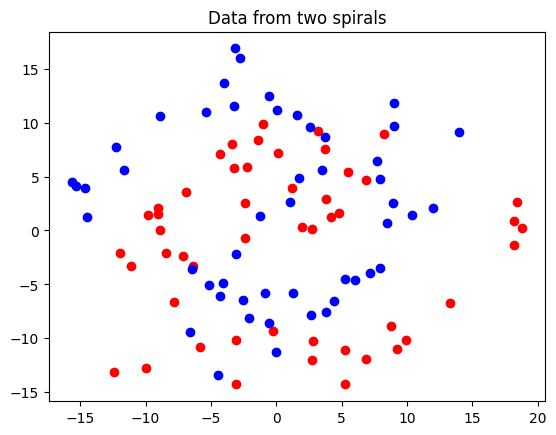

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

num_samples = 100
angle = np.linspace(0,2*pi,int(num_samples/2))
mean = [0.0, 0.0]
cov = [ [6.0, 6.0], [6.0, 6.0] ] 

X = np.zeros( (num_samples, 2) ) 

r_1 = 2*angle + pi
data_1 = np.array([np.cos(angle)*r_1, np.sin(angle)*r_1]).T
#print(data_1.shape)
X_1 = data_1 + np.random.multivariate_normal(mean, cov, int(num_samples/2)) #np.random.randn(int(num_samples/2),2)
X[:int(num_samples/2),:] = X_1

r_2 = -2*angle - pi
data_2 = np.array([np.cos(angle)*r_2, np.sin(angle)*r_2]).T
X_2 = data_2 + np.random.multivariate_normal(mean, cov, int(num_samples/2)) #np.random.randn(int(num_samples/2),2)
X[int(num_samples/2):,:] = X_2

y = np.ones(num_samples)
y[int(num_samples/2):] = -1*y[int(num_samples/2)]
#print(y)


print(X.shape)
print(y.shape)

figure, axes = plt.subplots(1) 
 

plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='o', color='blue')


plt.title( 'Data from two spirals' ) 
plt.show() 


Consider an input space $\mathcal{X} \subseteq {\mathbb{R}}^d$ and the output space $\mathcal{Y} \in \mathbb{R}$. Assume a fixed (but unknown) distribution $P(X,Y)$ over $\mathcal{X} \times \mathcal{Y}$. 

Recall that we are given a training set $D=\{(x^i,y^i)\}_{i=1}^{N}$. 

We shall now discuss an iterative procedure called $\large{\text{Gradient Boosting}}$ to improve classification performance. 

1. $h_0(x^i) = \frac{1}{N} \sum_{i=1}^{N} y^i, \forall i \in \{1,2,\ldots, N\}$.

2. $F_0 = h_0$.

3. $D_1=\{(x^i, z^i)\}_{i=1}^{N}$ where $z^i = y^i, \forall i \in \{1,2,\ldots, N\}$.

4. For round $t=0,1,2,\ldots,T$: 

  4.1. Compute gradients: $g^i_{t+1} =  \frac{\partial L(F_t)}{\partial F_t(x^i)}$ where $L(F_t) = \frac{1}{2} \sum_{i=1}^{N} (z^i - F_t(x^i))^2$. Hence    $g^i_{t+1} = F_t(x^i) - z^i, \forall i \in \{1,2,\ldots,N\}$.

  4.2. Construct data set $D_{t+1}=\{(x^i,z^i)\}_{i=1}^{N}$ where $z^i = -g^i_{t+1}, \forall i \in \{1,2,\ldots, N\}$.

  4.3. Train a classifier $h_{t+1}$ on the training set $D_{t+1}$ by solving the problem: $h_{t+1}, \rho_{t+1} = \arg\min_{h, \rho} L(h)$ where $L(h) = \frac{1}{2} \sum_{i=1}^{N} (z^i - \rho h(x^i))^2$ (typically using a regression tree). 

  4.4.  $F_{t+1} = F_{t} + \rho_{t+1} h_{t+1}$.  

$\large{\text{Final inference:}}$ 

Suppose if we run $T$ rounds, then at the end of $T$-th round, for a test sample $\hat{x}$, predict $\hat{y} =  \sum_{t=0}^{T} F_t(\hat{x})$. 


$\textbf{A candidate for classifier $h_t$:}$

Often $h_t$ is taken to be a very simple classifier. Here we consider a regression tree as a classifier. 

$\textbf{Note:}$ 

We will use a regression based gradient boosting algorithm for classification problem. We will use a fixed learning rate $\rho_t = 0.01, \ \forall \ 1 \leq t \leq T$. 

In [2]:
np.random.seed(1000)
#Create an index array 
indexarr = np.arange(num_samples) #index array
np.random.shuffle(indexarr) #shuffle the indices 
#print('shuffled indices of samples:')
#print(indexarr)

In [3]:
#Use the samples corresponding to first 80% of indexarr for training 
num_train = int(0.8*num_samples)
#Use the remaining 20% samples for testing 
num_test = num_samples-num_train
print('num_train: ',num_train, 'num_test: ', num_test)

num_train:  80 num_test:  20


In [4]:
#Use the first 80% of indexarr to create the train data features and train labels 
train_X = X[indexarr[0:num_train]]
train_y = y[indexarr[0:num_train]]
print('shape of train data features:')
print(train_X.shape)
print('shape of train data labels')
print(train_y.shape)

shape of train data features:
(80, 2)
shape of train data labels
(80,)


In [5]:
#Use remaining 20% of indexarr to create the test data and test labels  
test_X = X[indexarr[num_train:num_samples]]
test_y = y[indexarr[num_train:num_samples]]
print('shape of test data features:')
print(test_X.shape)
print('shape of test data labels')
print(test_y.shape)

shape of test data features:
(20, 2)
shape of test data labels
(20,)


In [6]:
def compute_predictions(X, trees):
  final_predictions = np.zeros(X.shape[0])
  idx = 0
  for tree in trees:
    regressor = tree['regressor']
    #print('regressor:',regressor)
    rho = tree['learn_rate']
    #print('rho:',rho)
    if idx == 0: #the zeroth tree is just a mean 
      final_predictions = np.add(final_predictions, rho*(regressor)*np.ones(X.shape[0]))  
      #print('inside inference: idx:',idx,'prediction:',final_predictions)
    else:
      predictions = regressor.predict(X)
      final_predictions = np.add(final_predictions, rho*predictions)
      #print('inside inference: idx:',idx,'prediction:',final_predictions)
    idx += 1
  final_predictions = 2*(final_predictions >= 0) - 1
  return final_predictions    

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor


y_pred = np.zeros(num_train)

trees = [] #list to store the individual regression trees

max_rounds = 30

F = np.ones(train_y.shape)*np.mean(train_y)
#print(F) 
z = train_y
rho = 0.001

#store the regressors
tree = dict()
tree['round'] = round
tree['regressor'] = np.mean(train_y) 
tree['learn_rate'] = 1
trees.append(tree)  

train_accuracies = [] #list for storing train set accuracies

for round in np.arange(1,max_rounds+1):  
  #compute gradients of loss L(F_t) with respect to F_t(x) to get grad_t
  grad =  F - z
  regressor = DecisionTreeRegressor(random_state=0)
  regressor.fit(train_X, -grad)
  
  F = F + rho * regressor.predict(train_X)
  #print('round:', round)
  #print('regression tree predictions:',regressor.predict(train_X))
  #print('predictions from F:', F)
  
  #store the regressors and weighted error rate
  tree = dict()
  tree['round'] = round
  tree['regressor'] = regressor
  tree['learn_rate'] = rho 

  trees.append(tree)

  #compute train acc for regressors till current round
  y_pred = compute_predictions(train_X, trees)
  train_acc = accuracy_score(train_y, y_pred)
  train_accuracies.append(train_acc)
  print('round:',round,'train acc:',train_acc)
  print('--------------------------------------------------')

  #move on to next round  

round: 1 train acc: 0.5125
--------------------------------------------------
round: 2 train acc: 0.5125
--------------------------------------------------
round: 3 train acc: 0.5125
--------------------------------------------------
round: 4 train acc: 0.5125
--------------------------------------------------
round: 5 train acc: 0.5125
--------------------------------------------------
round: 6 train acc: 0.5125
--------------------------------------------------
round: 7 train acc: 0.5125
--------------------------------------------------
round: 8 train acc: 0.5125
--------------------------------------------------
round: 9 train acc: 0.5125
--------------------------------------------------
round: 10 train acc: 0.5125
--------------------------------------------------
round: 11 train acc: 0.5125
--------------------------------------------------
round: 12 train acc: 0.5125
--------------------------------------------------
round: 13 train acc: 0.5125
---------------------------------

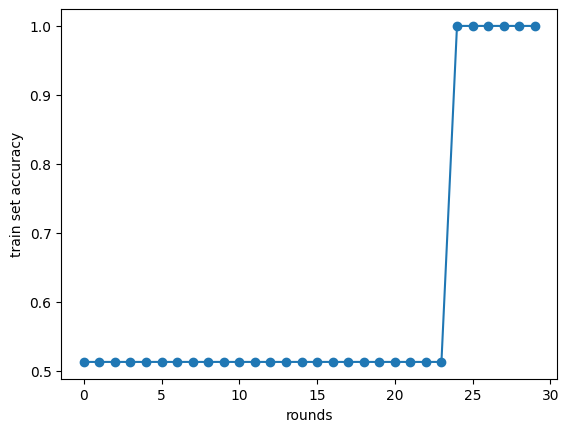

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(train_accuracies, marker='o')
plt.xlabel('rounds')
plt.ylabel('train set accuracy')
plt.show()

In [9]:
y_pred = compute_predictions(test_X, trees)
train_acc = accuracy_score(test_y, y_pred)
print('test acc:',train_acc)

test acc: 0.8


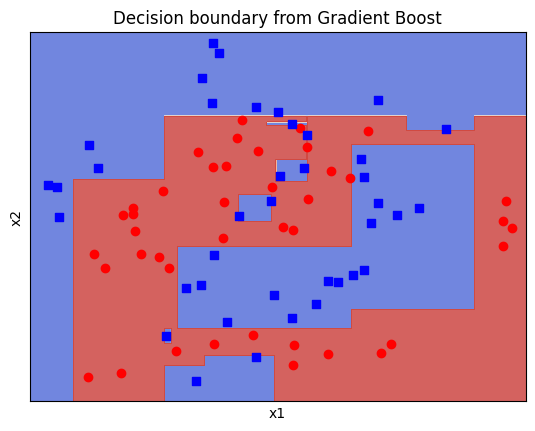

In [10]:
# create a mesh to plot in
h=0.02 #mesh step size
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

testX = np.c_[xx1.ravel(), xx2.ravel()]
#print(testX.shape) 
Z = compute_predictions(testX, trees)

# Put the result into a color plot
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)

idx_p = np.where(train_y == 1)
idx_n = np.where(train_y == -1)

plt.scatter(train_X[idx_p,0],train_X[idx_p,1], marker='o', color='red')
plt.scatter(train_X[idx_n,0],train_X[idx_n,1], marker='s', color='blue')

plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.xticks(())
plt.yticks(())
plt.title('Decision boundary from Gradient Boost')
plt.show()


$\large{\text{Exercises}}$

1. Observe that the gradient boosting algorithm severly overfits on the training set. Devise a strategy to control this behavior. Implement your strategy and check the performance on train and test sets. 

2. Adapt the code to solve the binary classification problem using logistic loss. 

3. Adapt the code to solve the binary classification problem using a modified Huber loss:

$
L(y, f(x)) = \begin{cases} 
              \max(0, 1-yf(x))^2, & \text{ if } yf(x)\geq -1 \\
              -4yf(x), & \text{ else}
              \end{cases}.
$
